## DATA 
The original dataset has 38593 records, which is an entire year of expenses.

Expenses are divided in 42 groups.  Each group has different categories (1 to n).  We are trying to predict categories for a given group according to its expense description. Additional columns like account number, supplier, source, and reference might be considered as parameters.

The first group to analyse is Car Expenses. It has 2899 records and 9 categories.


In [566]:
import pandas
import numpy
Exp_csv = pandas.read_csv('/Users/dianagalarza/Documents/DataScience/Project/SampleData_210_610.csv')
Exp_csv.head(2)

,GROUP,ID_ACC,SUB_GROUP,ID_SUP,ID_JOU,MONTH,SOURCE,REF,DESC,AUX1,DB,ID_CC,CATEGORY,VALUE,COUNT
0,CAR EXPENSES,62201115,210,P00000939,TES,8,SAP,0050003753,KR- 006 REEMBOLSO AGO 28,006,PPP,6578,210-006,2,1
1,CAR EXPENSES,62201916,210,P00001179,NOM,1,ADP,103,Gasolina,na,PPP,6578,210-001,8,1


In [567]:
list(Exp_csv)

['GROUP',
 'ID_ACC',
 'SUB_GROUP',
 'ID_SUP',
 'ID_JOU',
 'MONTH',
 'SOURCE',
 'REF',
 'DESC',
 'AUX1',
 'DB',
 'ID_CC',
 'CATEGORY',
 'VALUE',
 'COUNT']

In [568]:
# Categories - to be predicted
Exp_csv.CATEGORY.unique()

array(['210-006', '210-001', '210-008', '210-005', '210-999', '210-007',
       '210-004', '210-003', '210-002'], dtype=object)

In [569]:
Exp_csv.dtypes

GROUP        object
ID_ACC        int64
SUB_GROUP     int64
ID_SUP       object
ID_JOU       object
MONTH         int64
SOURCE       object
REF          object
DESC         object
AUX1         object
DB           object
ID_CC         int64
CATEGORY     object
VALUE         int64
COUNT         int64
dtype: object

In [570]:
Exp_csv.count()

GROUP        2899
ID_ACC       2899
SUB_GROUP    2899
ID_SUP       2895
ID_JOU       2899
MONTH        2899
SOURCE       2875
REF          2875
DESC         2899
AUX1         2899
DB           2899
ID_CC        2899
CATEGORY     2899
VALUE        2899
COUNT        2899
dtype: int64

## DATA PREPROCESSING & ANALYSIS 

* Replace null values with NA: 

In [571]:
Exp = Exp_csv.fillna({'ID_SUP':'NA', 'SOURCE':'NA', 'REF':'NA' })


* Possible parameters:


In [149]:
# Accounts
Exp.ID_ACC.astype(str).describe()

count         2899
unique           6
top       62201922
freq          1696
Name: ID_ACC, dtype: object

In [148]:
# Sub-groups
Exp.SUB_GROUP.astype(str).describe()

count     2899
unique       2
top        210
freq      2860
Name: SUB_GROUP, dtype: object

In [166]:
# Suppliers
Exp.ID_SUP.astype(str).describe()

count          2899
unique           85
top       P00001179
freq           2508
Name: ID_SUP, dtype: object

In [150]:
#Sources
Exp.SOURCE.astype(str).describe()

count     2899
unique      14
top        ADP
freq      2416
Name: SOURCE, dtype: object

In [151]:
#Journal Types
Exp.ID_JOU.astype(str).describe()

count     2899
unique       6
top        NOM
freq      2442
Name: ID_JOU, dtype: object

In [165]:
# References - it is a kind of description, but shorter. It could be a date, a number, a code...
Exp.REF.astype(str).describe()

count       2899
unique       555
top       OPP-CA
freq          35
Name: REF, dtype: object

In [154]:
#Descriptions
Exp.DESC.astype(str).describe()

count               2899
unique               276
top       Car Allowances
freq                 838
Name: DESC, dtype: object

In [591]:
#Aux category
# It is a substring of the description. It could be the category, but it is not always correct.
Exp.AUX1.astype(str).describe()

count     2899
unique      13
top         na
freq      2529
Name: AUX1, dtype: object

In [161]:
# Databases
Exp.DB.astype(str).describe()

count     2899
unique       2
top        PPP
freq      2505
Name: DB, dtype: object

In [163]:
# Cost Centers
Exp.ID_CC.astype(str).describe()

count     2899
unique      62
top       6875
freq       325
Name: ID_CC, dtype: object

In [164]:
#Category - this is the column we want to predict
Exp.CATEGORY.astype(str).describe()

count        2899
unique          9
top       210-001
freq         2518
Name: CATEGORY, dtype: object

In the Car Expenses sample data are  2 subgroups, 6 accounts, 85 suppliers, 14 sources, 6 journal types, 555 references, 276 descriptions, 13 auxiliar categories, 2 databases, 62 cost centers, and 9 Categories 

## Concatenating all strings to a single "sentence" 
#### Following a bag-of-words strategy, different columns are going to be concatenated to form a single "sentece".

In [294]:
Exp1 = Exp
Exp1.head(2)

,GROUP,ID_ACC,SUB_GROUP,ID_SUP,ID_JOU,MONTH,SOURCE,REF,DESC,AUX1,DB,ID_CC,CATEGORY,EXP,Long_Str
0,CAR EXPENSES,62201115,210,P00000939,TES,8,SAP,0050003753,KR- 006 REEMBOLSO AGO 28,006,PPP,6578,210-006,2.0,62201115 P00000939 TES SAP 006 6578 KR- 006 RE...
1,CAR EXPENSES,62201916,210,P00001179,NOM,1,ADP,103,Gasolina,na,PPP,6578,210-001,8.4,62201916 P00001179 NOM ADP na 6578 Gasolina


First attempt, a single "sentence" with: Acount + Supplier + JournalType + Source + Auxiliar category + Cost Center + Description

In [565]:
Exp1['Long_Str'] = Exp1['ID_ACC'].astype(str) + ' ' + Exp1['ID_SUP'].astype(str) + ' ' + Exp1['ID_JOU'].astype(str) + ' ' +Exp1['SOURCE'].astype(str) + ' ' + Exp1['AUX1'].astype(str)   + ' ' + Exp1['ID_CC'].astype(str)  + ' ' + Exp1['DESC'].astype(str)


In [314]:
Exp1[['Long_Str']].head(5)

,Long_Str
0,62201115 P00000939 TES SAP 006 6578 KR- 006 RE...
1,62201916 P00001179 NOM ADP na 6578 Gasolina
2,62201916 P00001179 NOM ADP na 6578 Gasolina
3,62201916 P00001179 NOM ADP na 6578 Gasolina
4,62201916 P00001179 NOM ADP na 6578 Gasolina


#### The steps below were completed by following this tutorial:       http://radimrehurek.com/data_science_python/

In [275]:
#!pip install -U textblob
#!python -m textblob.download_corpora


In [276]:
# Converting string to a vector
from textblob import TextBlob
def split_into_tokens(Long_Str):
    message = unicode(Long_Str, 'utf8')  # convert bytes into proper unicode
    return TextBlob(Long_Str).words

In [506]:
# Sample of strings as vectors
Exp1.Long_Str.head().apply(split_into_tokens)

0    [62201115, P00000939, TES, SAP, 006, 6578, KR,...
1    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
2    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
3    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
4    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
Name: Long_Str, dtype: object

* An attempt to normalize data. In this case, it is mostly codes, so I don't expect to be very helpful.

In [295]:
def split_into_lemmas(Long_Str):
    message = unicode(Long_Str, 'utf8').lower()
    words = TextBlob(Long_Str).words
    return [word.lemma for word in words]

In [296]:
Exp1.Long_Str.head(5).apply(split_into_lemmas)

0    [62201115, P00000939, TES, SAP, 006, 6578, KR,...
1    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
2    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
3    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
4    [62201916, P00001179, NOM, ADP, na, 6578, Gaso...
Name: Long_Str, dtype: object

In [297]:
# Now a sparse matrix is created using sklearn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [298]:
Exp_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(Exp1['Long_Str'])
print len(Exp_transformer.vocabulary_)

515


In [517]:
# A sample record
String1 = Exp1['Long_Str'][0]
String1

'62201115 P00000939 TES SAP 006 6578 KR- 006 REEMBOLSO AGO 28'

In [518]:
# Sample record 
Vector = Exp_transformer.transform([String1])
print Vector
print Vector.shape

  (0, 15)	2
  (0, 121)	1
  (0, 136)	1
  (0, 171)	1
  (0, 218)	1
  (0, 321)	1
  (0, 387)	1
  (0, 452)	1
  (0, 465)	1
  (0, 480)	1
(1, 515)


It means there are 10 words, each one has a number assigned. The first word is found twice in the senctence.

In [519]:
# Checking the sparsity - The bag-of-words creates a large sparse matrix.
Exp_info = Exp_transformer.transform(Exp1['Long_Str'])
print 'sparse matrix shape:', Exp_info.shape
print 'number of non-zeros:', Exp_info.nnz
print 'sparsity: %.2f%%' % (100.0 * Exp_info.nnz / (Exp_info.shape[0] * Exp_info.shape[1]))

sparse matrix shape: (2899, 515)
number of non-zeros: 23206
sparsity: 1.55%


In [287]:
# Term frequency - weight and normalization
tfidf_transformer = TfidfTransformer().fit(Exp_info)
tfidf4 = tfidf_transformer.transform(Vector)
print tfidf4

  (0, 510)	0.171581388257
  (0, 439)	0.172839767242
  (0, 348)	0.176864370023
  (0, 300)	0.351767779505
  (0, 216)	0.178479751982
  (0, 171)	0.797687593535
  (0, 138)	0.342788779332


"tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general."
(from wikipedia)

In [301]:
#frequency of sample codes/words
print tfidf_transformer.idf_[Exp_transformer.vocabulary_['006']]
print tfidf_transformer.idf_[Exp_transformer.vocabulary_['Gasolina']]

3.81917442148
2.32997921461


In [308]:
# Transform the entire bag-of-workds corpus 
Exp1_tfidf = tfidf_transformer.transform(Exp_info)
Exp1_tfidf.shape

(2899, 515)

In [310]:
Exp1_tfidf

<2899x515 sparse matrix of type '<type 'numpy.float64'>'
	with 23206 stored elements in Compressed Sparse Row format>

## Data Training

In [303]:
# Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB

In [313]:
# time tracking of classifier
%time category_detector = MultinomialNB().fit(Exp1_tfidf, Exp1['CATEGORY'])

CPU times: user 8.01 ms, sys: 1.3 ms, total: 9.31 ms
Wall time: 8.56 ms


In [319]:
# testing a single row 

print 'predicted:', category_detector.predict(Vector)[0]
print 'expected:', Exp1.CATEGORY[1]

 predicted: 210-001
expected: 210-001


In [388]:
# Pipeline - includes 3 steps into one
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=split_into_lemmas)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [394]:
# pipeline test
example = ['62201916 P00001179 NOM ADP na 6578 Gasolina']
pipeline.fit(Exp2['Long_Str'].values, Exp2['CATEGORY'].values)
pipeline.predict(example) 

array(['210-001'], 
      dtype='|S7')

In [372]:
# Selecting data to train
import sklearn.cross_validation 
(str_train, str_test, category_train, category_test) = sklearn.cross_validation.train_test_split(
    Exp1['Long_Str'], Exp1['CATEGORY'], test_size=0.2)

print len(str_train), len(str_test), len(str_train) + len(str_test)

2319 580 2899


In [374]:
#Cross validation - accuracy
scores = sklearn.cross_validation.cross_val_score(pipeline,  # steps to convert raw messages into models
                         str_train,  # training data
                         category_train,  # training categories
                         cv=5,  # split data randomly into 5 parts: X for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print scores

[ 0.96794872  0.96781116  0.96344086  0.97826087  0.97608696]


In [375]:
print scores.mean(), scores.std()

0.97070971261 0.00556409281567


#### The K-fold validation was completed using this tutorial: http://zacstewart.com/2015/04/28/document-classification-with-scikit-learn.html

In [442]:
# K-Fold cross validation 

CAT = '210-001'
Exp2 = Exp1[['CATEGORY','Long_Str']]

from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score

k_fold = KFold(n=len(Exp2), n_folds=2)
scores1 = []
confusion = numpy.array([ [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0]  ])
for category_train, category_test in k_fold:
    str_train = Exp2.iloc[category_train]['Long_Str'].values
    train_y = Exp2.iloc[category_train]['CATEGORY'].values

    str_test = Exp2.iloc[category_test]['Long_Str'].values
    test_y = Exp2.iloc[category_test]['CATEGORY'].values

    pipeline.fit(str_train, train_y)
    predictions = pipeline.predict(str_test)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label=CAT)
    scores1.append(score)

print('Total desc classified:', len(Exp2))
print('Score:', sum(scores1)/len(scores1))
print('Confusion matrix:')
print(confusion)


/Users/dianagalarza/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


('Total desc classified:', 2899)
('Score:', 0.96504603498349284)
Confusion matrix:
[[2518    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0   12    0    0    0]
 [   0    0    1    3    0   10    0    0    0]
 [   0    0    0   69    0    0    0    0    0]
 [   0    0    0    1    9   18    0    0    0]
 [   2    0    0    0    0  183    0    0    1]
 [   2    0    0    0    0    1    0    3    4]
 [   0    0    0    0    0    7    0   16    0]
 [   4    0    0    0    0   11    0    0   22]]


/Users/dianagalarza/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


## Improving the model

In [445]:
# testing without normalization 

# Pipeline - includes 3 steps into one
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=split_into_lemmas)),  # strings to token integer counts
   # ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [446]:
# Selecting data to train
import sklearn.cross_validation 
(str_train, str_test, category_train, category_test) = sklearn.cross_validation.train_test_split(
    Exp1['Long_Str'], Exp1['CATEGORY'], test_size=0.2)

#Cross validation - accuracy
scores = sklearn.cross_validation.cross_val_score(pipeline,  # steps to convert raw messages into models
                         str_train,  # training data
                         category_train,  # training categories
                         cv=5,  # split data randomly into 5 parts: X for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print scores
print scores.mean(), scores.std()

[ 0.99143469  0.98494624  0.98922414  0.9762419   0.98695652]
0.985760697277 0.00523240748922


In [447]:
# K-Fold cross validation 

CAT = '210-001'

from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score

k_fold = KFold(n=len(Exp2), n_folds=2)
scores1 = []
confusion = numpy.array([ [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0] , [0, 0, 0, 0, 0, 0, 0, 0, 0]  ])
for category_train, category_test in k_fold:
    str_train = Exp2.iloc[category_train]['Long_Str'].values
    train_y = Exp2.iloc[category_train]['CATEGORY'].values

    str_test = Exp2.iloc[category_test]['Long_Str'].values
    test_y = Exp2.iloc[category_test]['CATEGORY'].values

    pipeline.fit(str_train, train_y)
    predictions = pipeline.predict(str_test)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label=CAT)
    scores1.append(score)

print('Total desc classified:', len(Exp2))
print('Score:', sum(scores1)/len(scores1))
print('Confusion matrix:')
print(confusion)

/Users/dianagalarza/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


('Total desc classified:', 2899)
('Score:', 0.97684522179496824)
Confusion matrix:
[[2506    0    0    0    0    0    0    0   12]
 [   0    6    6    2    0    0    0    0    0]
 [   0    4    6    3    0    1    0    0    0]
 [   0    0    0   68    0    0    0    1    0]
 [   0    0    0    0   28    0    0    0    0]
 [   1    1    0    1    1  181    0    1    0]
 [   2    0    0    1    0    0    1    5    1]
 [   0    2    3    0    0    2    0   16    0]
 [   3    0    1    2    3    2    0    2   24]]


/Users/dianagalarza/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


### Analysis of results 
It makes sense that the result is better without normalization, because the description is not Natural Language. The description column is limited to 30 characters which make it almost like a code.  

In [449]:
%matplotlib inline
import matplotlib.pyplot as plt

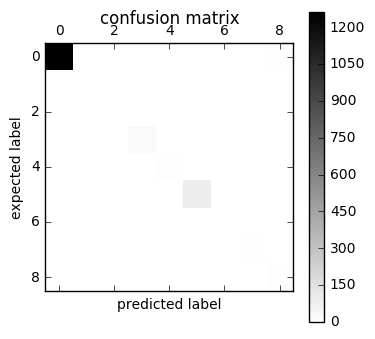

In [493]:
plt.matshow(confusion_matrix(test_y,  predictions), cmap=plt.cm.binary , interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Most records of the data sample are in a single category.

In [592]:
# This is a better report to understand how accurate was the prediction for each category
from sklearn.metrics import classification_report
target_names = ['210-001', '210-002', '210-003','210-004','210-005','210-006','210-007','210-008','210-999']
print(classification_report(test_y, predictions, target_names=target_names, digits=5))

             precision    recall  f1-score   support

    210-001    0.99763   0.99527   0.99645      1268
    210-002    0.36364   1.00000   0.53333         4
    210-003    1.00000   0.20000   0.33333        10
    210-004    0.87879   0.96667   0.92063        30
    210-005    1.00000   1.00000   1.00000        14
    210-006    0.97802   0.97802   0.97802        91
    210-007    0.00000   0.00000   0.00000         5
    210-008    0.64286   0.81818   0.72000        11
    210-999    0.63158   0.75000   0.68571        16

avg / total    0.98205   0.98068   0.97893      1449



## Some Conclusions

I will need to test this classifier with different description strings.  In the previous example, I used a single string concatenating: Account + Supplier + Journal Type + Source + Aux category + Cost Center + Description.  It could be interesting to see how results change when removing some of this columns.

It is necesa

It could also be interesting to treat each column (account, supplier, etc.) as a different parameter, instead of using the bag-of-word strategy.

I found an option to count n-grams instead of single words (kind of counting combination of words), I could try it. However, I need to find additional options to NLP, because my descriptions is not exactly natural language.  In addition, the words used in the description column are in English and Spanish, and sometimes the words are not separated by whitespaces.

I also found some variations of Naïve Bayes (like BernoulliNB), I will need to understand these functions better and test the data against them.

Finally, I would need to run the classification in different groups. This example was done with only one, Car Expenses. Although it seems like a good result in terms of accuracy, the problem with this data set is that most of the records are in a single category.